https://www.storytellingwithdata.com/

https://python-graph-gallery.com/


### Decision Tree 

In [7]:
import numpy as np
import pandas as pd
import os #  Get the current working directory or change the directory

In [8]:
os.getcwd()

'C:\\Users\\HP'

In [9]:
os.listdir() # shows all the files in the current working directory

['-1.14-windows.xml',
 '.anaconda',
 '.android',
 '.aws',
 '.bash_history',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.ms-ad',
 '.openjfx',
 '.ssh',
 '.vivaldi_reporting_data',
 '.vscode',
 '1.3.6',
 '3D Objects',
 'adult.data',
 'Airbnb.csv',
 'anaconda3',
 'AppData',
 'Application Data',
 'Ariel_disney.png',
 'badminton.jpg',
 'bank-direct-marketing-campaigns.csv',
 'Cars',
 'Class 10 Visualization Hands On Compilation.ipynb',
 'Class 11 HR Analytics Old Compilation.ipynb',
 'Class 12 and 13 Statistics and Probability Compilation.ipynb',
 'Class 14 Statistics and Probability Hands On Compilation.ipynb',
 'Class 15 US Honey Case Study Compilation.ipynb',
 'Class 16 and 17 of Inferential Statistics Compilation.ipynb',
 'Class 18 of Inferential Statistics Compilation.ipynb',
 'Class 19 of Inferential Statistics Compilation.ipynb',
 'Class 2 (Pandas Basics) compilation.ipynb',
 'Class 20 Purchase Ca

In [10]:
train_df = pd.read_csv('train_dt.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train_df.sample(3).T #.sample randomly picks rows from the data

,193,264,266
Loan_ID,LP001658,LP001872,LP001877
Gender,Male,Male,Male
Married,No,No,Yes
Dependents,0,0,2
Education,Graduate,Graduate,Graduate
Self_Employed,No,Yes,No
ApplicantIncome,3858,5166,4708
CoapplicantIncome,0.0,0.0,1387.0
LoanAmount,76.0,128.0,150.0
Loan_Amount_Term,360.0,360.0,360.0


### Exploratory Data Analysis

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
#Check for missing data
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train_df.isnull().sum()/len(train_df)*100
# Generally if value is 1% we can drop the values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
train_df.dropna(inplace = True)

In [16]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train_df.duplicated().sum()

0

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

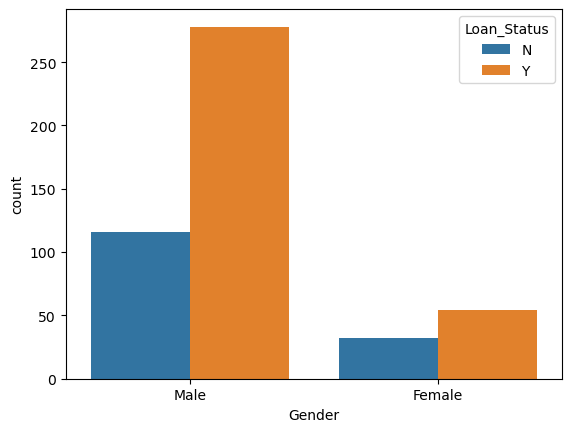

In [19]:
# checking Relationship between Gender and Loan approval
plt.plot(figsize = (8,6))
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = train_df)
plt.show()

In [20]:
# The 'Groupby' function essentially splits a DataFrame into groups based on the values in one or more columns. 
# You can then perform operations on these groups, such as:
# Aggregation: Calculate summary statistics for each group (e.g., sum, mean, count, min, max).
# Transformation: Apply a function to each group and modify the data within the group.
# Filtration: Select specific groups based on certain criteria.

df_summ = train_df.groupby(['Gender', 'Loan_Status']).agg(Loan_approved_count = ('Loan_Status', 'count')).reset_index()
df_summ

,Gender,Loan_Status,Loan_approved_count
0,Female,N,32
1,Female,Y,54
2,Male,N,116
3,Male,Y,278


In [21]:
df_summ_applicants = train_df.groupby(['Gender']).agg(Loan_approved_count = ('Loan_Status', 'count')).reset_index()
df_summ_applicants

,Gender,Loan_approved_count
0,Female,86
1,Male,394


In [22]:
df_summ_applicants_merged = df_summ.merge(df_summ_applicants, how = 'left', on = 'Gender')
df_summ_applicants_merged

,Gender,Loan_Status,Loan_approved_count_x,Loan_approved_count_y
0,Female,N,32,86
1,Female,Y,54,86
2,Male,N,116,394
3,Male,Y,278,394


In [23]:
df_summ_applicants_merged['Approval_Rejection%'] = df_summ_applicants_merged['Loan_approved_count_x']/df_summ_applicants_merged['Loan_approved_count_y']
df_summ_applicants_merged

,Gender,Loan_Status,Loan_approved_count_x,Loan_approved_count_y,Approval_Rejection%
0,Female,N,32,86,0.372093
1,Female,Y,54,86,0.627907
2,Male,N,116,394,0.294416
3,Male,Y,278,394,0.705584


#### Relationship between Income and Loan approval

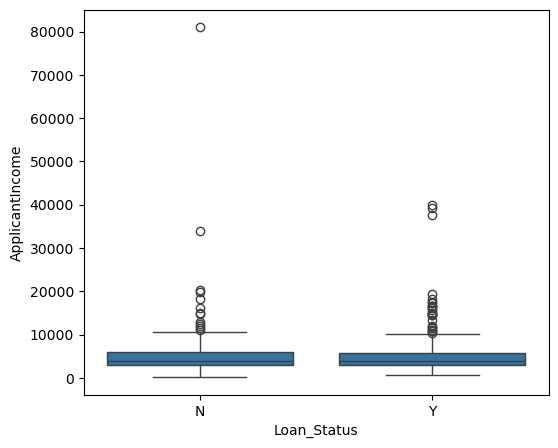

In [24]:
plt.figure(figsize = (6,5))
sns.boxplot(x= 'Loan_Status', y = 'ApplicantIncome', data = train_df)
plt.show()

In [25]:
train_df['ApplicantIncome'].describe()
# There is huge variability in the applicant Income 

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

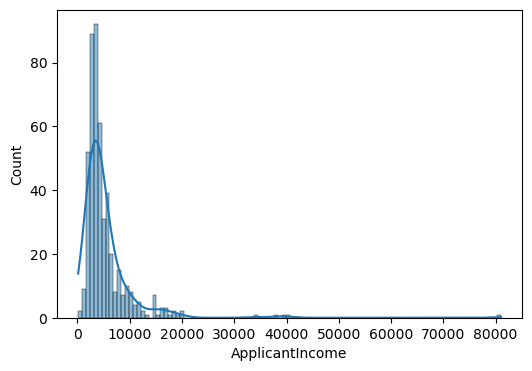

In [26]:
plt.figure(figsize = (6,4))
sns.histplot(x = 'ApplicantIncome', data = train_df, kde = True)
plt.show()

In [27]:
# Masking technique
sel_income = train_df['ApplicantIncome']<=12000

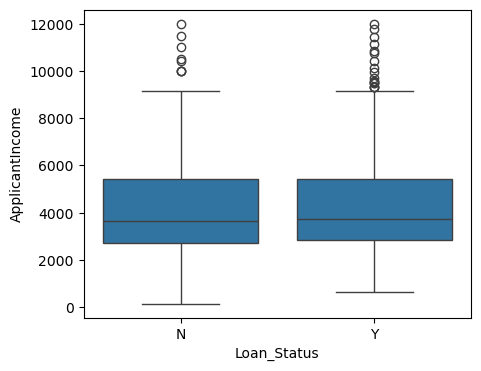

In [28]:
plt.figure(figsize = (5,4))
sns.boxplot(x = train_df[sel_income]['Loan_Status'], y = train_df[sel_income]['ApplicantIncome'])
plt.show()

In [29]:
# The boxplot, adjusted for outliers, suggests that applicant income is not a strong predictor of loan approval status.

#### Relationship between Loan and Loan amount

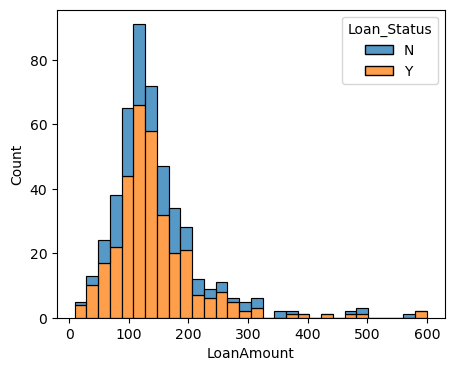

In [30]:
plt.figure(figsize = (5,4))
sns.histplot(x = 'LoanAmount', hue = 'Loan_Status', data = train_df, multiple = 'stack', bins = 30)
plt.show()

In [31]:
# Based on the figure, we cannot definitively conclude that there is a direct relationship between the loan amount requested 
# and the subsequent approval or rejection of the loan application
# For distribution use either a scatterplot, histogram or a box plot
# Count plot is for categorical data


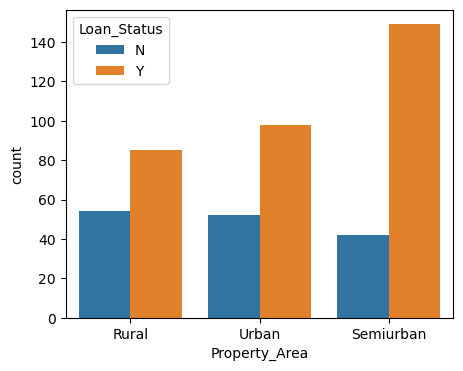

In [32]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = train_df)
plt.show()

# The figure indicates a higher rate of loan rejection for applicants residing in rural areas compared to urban areas

#### Relationship between self-emplyed and Loan Status

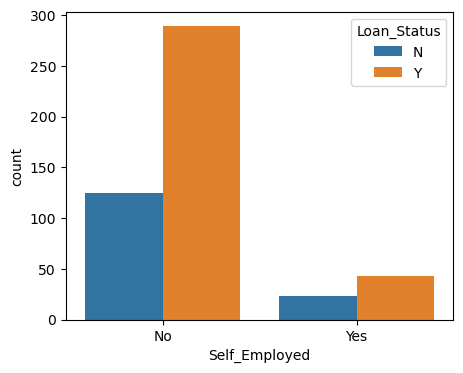

In [33]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Self_Employed', hue = train_df['Loan_Status'], data = train_df)
plt.show()

In [34]:
numeric_columns = train_df.select_dtypes(include =['number'])

In [35]:
corr = numeric_columns.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<Axes: >

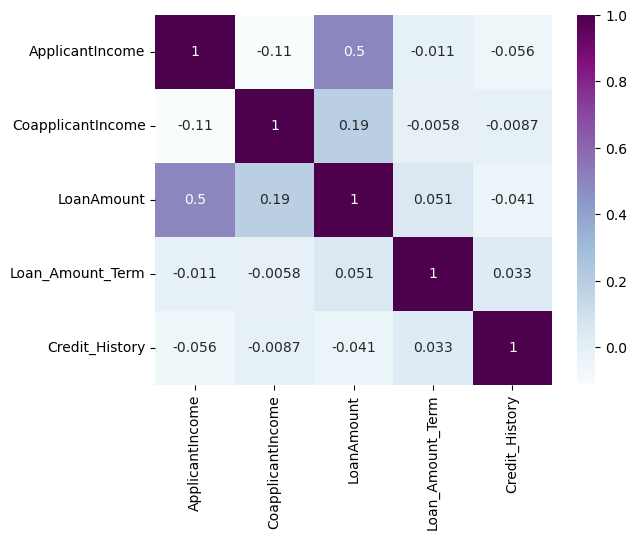

In [36]:
sns.heatmap(corr, annot = True, cmap = 'BuPu', fmt='.2g', linecolor = 'white')

#### Input variables seem to be not correlated much which is showing no signs of multicollinearity
#### Correlation value between -0.3 and 0.3 == > weak correlation
#### Key takeaway: Applicant incomes seems to be moderately correlated with the loan amount

### Encoding Caegorical features

In [37]:
sel_columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
ohe_encoded = pd.get_dummies(train_df[sel_columns], drop_first = True)
ohe_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,False
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,False,False
611,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,False,False,True


In [40]:
ohe_encoded = ohe_encoded.astype(int)

In [41]:
# drop_first=True: it drops the first level of each categorical variable after encoding. it is done to prevent multicollinearity.
# For example, train_df['Property_Area'].unique() has 3 variables --> 'Urban', 'Semi_Urban' and 'Rural'. 
# This introduces multicolinearity.If rural = 1, Urban = 0 and SemiUrban = 0. 
# To avoid multicollinearity we use drop_first = True
# LabelEncoding is not used because it introduces bias. Gives much preference to a higher number. Example: if there are 8
# separate groups withing a column and numbers a re assigned to them sequentially, preference will be given to the higher order

In [42]:
train_df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [43]:
ohe_encoded.head(3).T

,1,2,3
ApplicantIncome,4583,3000,2583
CoapplicantIncome,1508,0,2358
LoanAmount,128,66,120
Loan_Amount_Term,360,360,360
Credit_History,1,1,1
Gender_Male,1,1,1
Married_Yes,1,1,1
Dependents_1,1,0,0
Dependents_2,0,0,0
Dependents_3+,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
X = ohe_encoded

In [48]:
train_df['Target'] = train_df['Loan_Status'].replace({'Y':1, 'N':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_18320\1383331199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Target'] = train_df['Loan_Status'].replace({'Y':1, 'N':0})


In [49]:
y = train_df['Target']

In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Target, Length: 480, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# random_state I: its called seeding which gives a key to the set of random sampled values so that even the notebook restarts, 
# samples don't change for train and test splits

In [52]:
x_train.shape

(384, 14)

In [53]:
x_test.shape

(96, 14)

### Building the DT Model


In [54]:
tree_mod_1 = DecisionTreeClassifier()

In [55]:
tree_mod_1

DecisionTreeClassifier()

In [56]:
tree_mod_1.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
pred_values = tree_mod_1.predict(x_test)
pred_values


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

### Performance Metrics

In [58]:
from sklearn.metrics import *

In [59]:
print('Validation Accuracy:', accuracy_score(y_test, pred_values)*100)

Validation Accuracy: 73.95833333333334


In [60]:
CM = confusion_matrix(y_test, pred_values)
CM

array([[16, 12],
       [13, 55]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Table')

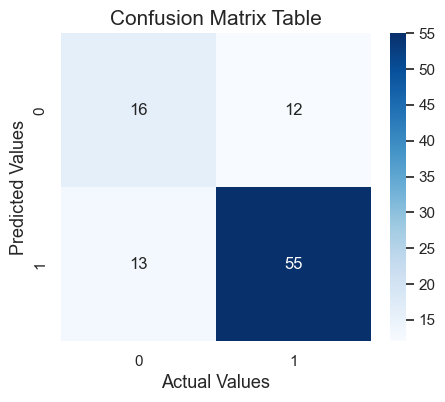

In [61]:
plt.figure(figsize = (5,4))
sns.set(font_scale=1)
sns.heatmap(CM, annot = True, cmap = 'Blues', linecolor = 'black', fmt = 'd')
plt.xlabel('Actual Values', fontsize = 13)
plt.ylabel('Predicted Values', fontsize = 13)
plt.title('Confusion Matrix Table', fontsize = 15)

In [62]:
clf = classification_report(y_test, pred_values)
print(clf)

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.82      0.81      0.81        68

    accuracy                           0.74        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.74      0.74      0.74        96



In [63]:
# Splitter- this paramter decides how the algorithm split the nodes
# a) Best: choses the best split based on the specified criteni (gini or entropy)
# b> Random : choses the best random split - can be usefu te reduce overfitting.

# Max_depth (very imp): Controls the depth of the tree, decides how deep a tree can go. Limiting the depth of the tree can
# reduce overfitting as it will not learn from the noise of the data

# Min Sample Split: Minimum number of samples required for the data to split. Min samples required = 2
# If the number of samples is less than the minimum samples required for the split, say , 8 the further split will be avoided
# making the node the terminal node.

# Problem with the Linear and Logistic Regression = Outliers
# Problem with Decision Tree = Overfitting(it does not have the outliers)
# Overfitting can be take care of using parameters like Min_sample_split


### What is the difference between Accuracy and Precision

In [64]:
# Accuracy is the degree to which the result (of a measurement, calculation) conforms to the correct value or a standard. 
# It's the ratio of correctly predicted observations to the total observations.
# Formula: (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
# In simpler terms: Out of all the predictions made, how many were correct?
# Accuracy is a good general metric when the dataset is balanced
# ------------------------------------------------------------------------------------------------------------------------------
# Precision measures the accuracy of positive predictions. 
# It's the ratio of correctly predicted positive observations to the total predicted positive observations
# Formula: True Positives / (True Positives + False Positives)
# In simpler terms: Out of all the instances predicted as positive, how many were actually positive?
# Use case: Precision is important when the cost of false positives is high. For example, in spam detection, 
# you want to minimize the number of legitimate emails (true negatives) being classified as spam (false positives).

# Simply put, Accuracy is a measure of overall correctness.i.e out of a given number(covid+ve), how many actually are covid+ve.
            # Precision is a measure of how reliable positive predictions are.

### Recall and Sensitivity

In [65]:
# Recall is the is the instance where we determine out of all the actual positive instances, how many did the model correctly identify?
# You know the actual count and you're just trying to recall 
# Recall is crucial when the cost of false negatives is high. For example, in medical diagnosis, you want to minimize 
# the number of actual diseases (true positives) being missed (false negatives).
# formula: True Positives / (True Positives + False Negative)

# In a spam detection system:
# High recall is desirable to ensure that all spam emails are caught, even if some legitimate emails are misclassified as spam.
# High precision is desirable to minimize the number of legitimate emails being flagged as spam.
# In a medical diagnosis system:
# High recall is crucial to avoid missing any actual cases of the disease.
# High precision is also important to avoid unnecessary treatment for healthy individuals.

# Note for imbalanced kind of dataset ---> 'Precision' and 'Recall' is a good metric and not the 'Accuracy'.

# SUPPORT refers to number of true instances in each class

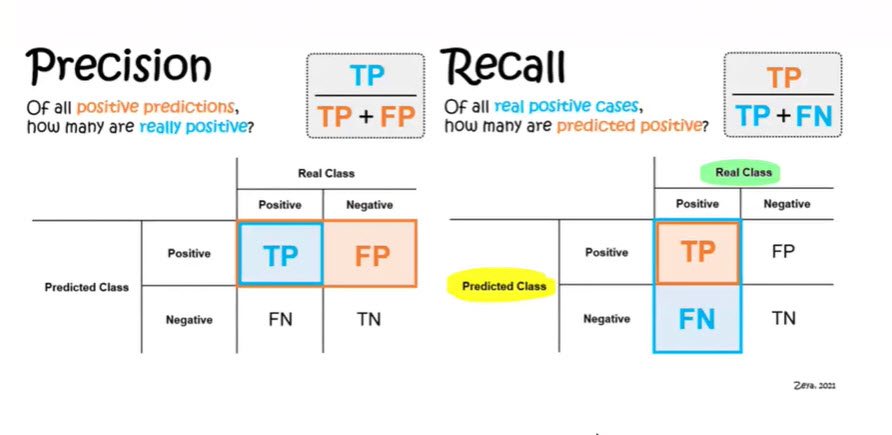

### Hyperparameter Tuning Models

In [66]:
from sklearn.model_selection import GridSearchCV

### Building the DT Model using HyperParameter Tuning

In [67]:
tree_mod_2 = DecisionTreeClassifier()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#### Define the Hyper Parameter Grid

In [69]:
# Parameter grid is something you can create like a dictionary
para_grid = {'criterion':['gini','entropy'],
            'max_depth': [None, 10,20,30],
            'min_samples_split': [2,10,20],
            'min_samples_leaf': [1,5,10]}
# Combinations expected: criterion(2), max_depth(4), min_samples_split(3), min_samples_leaf(3). So total = 2x4x3x3=72

#### Performing GridSearch with Cross Validation

In [70]:
grid_search = GridSearchCV(estimator = tree_mod_2, param_grid = para_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
# n_jobs = -1 means use all the processors 

In [71]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [72]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [73]:
print("Best Accuracy Score for  CV:", grid_search.best_score_*100)

Best Accuracy Score for  CV: 76.05263157894737


#### Evaluating the best model on the test set

In [74]:
best_model = grid_search.best_estimator_

In [75]:
test_accuracy = best_model.score(x_test, y_test)

In [76]:
print("Test Accuracy:", test_accuracy*100)

Test Accuracy: 73.95833333333334


### Visualizing the Decision Tree

In [77]:
best_model

DecisionTreeClassifier(min_samples_leaf=10)

In [78]:
from sklearn.tree import plot_tree

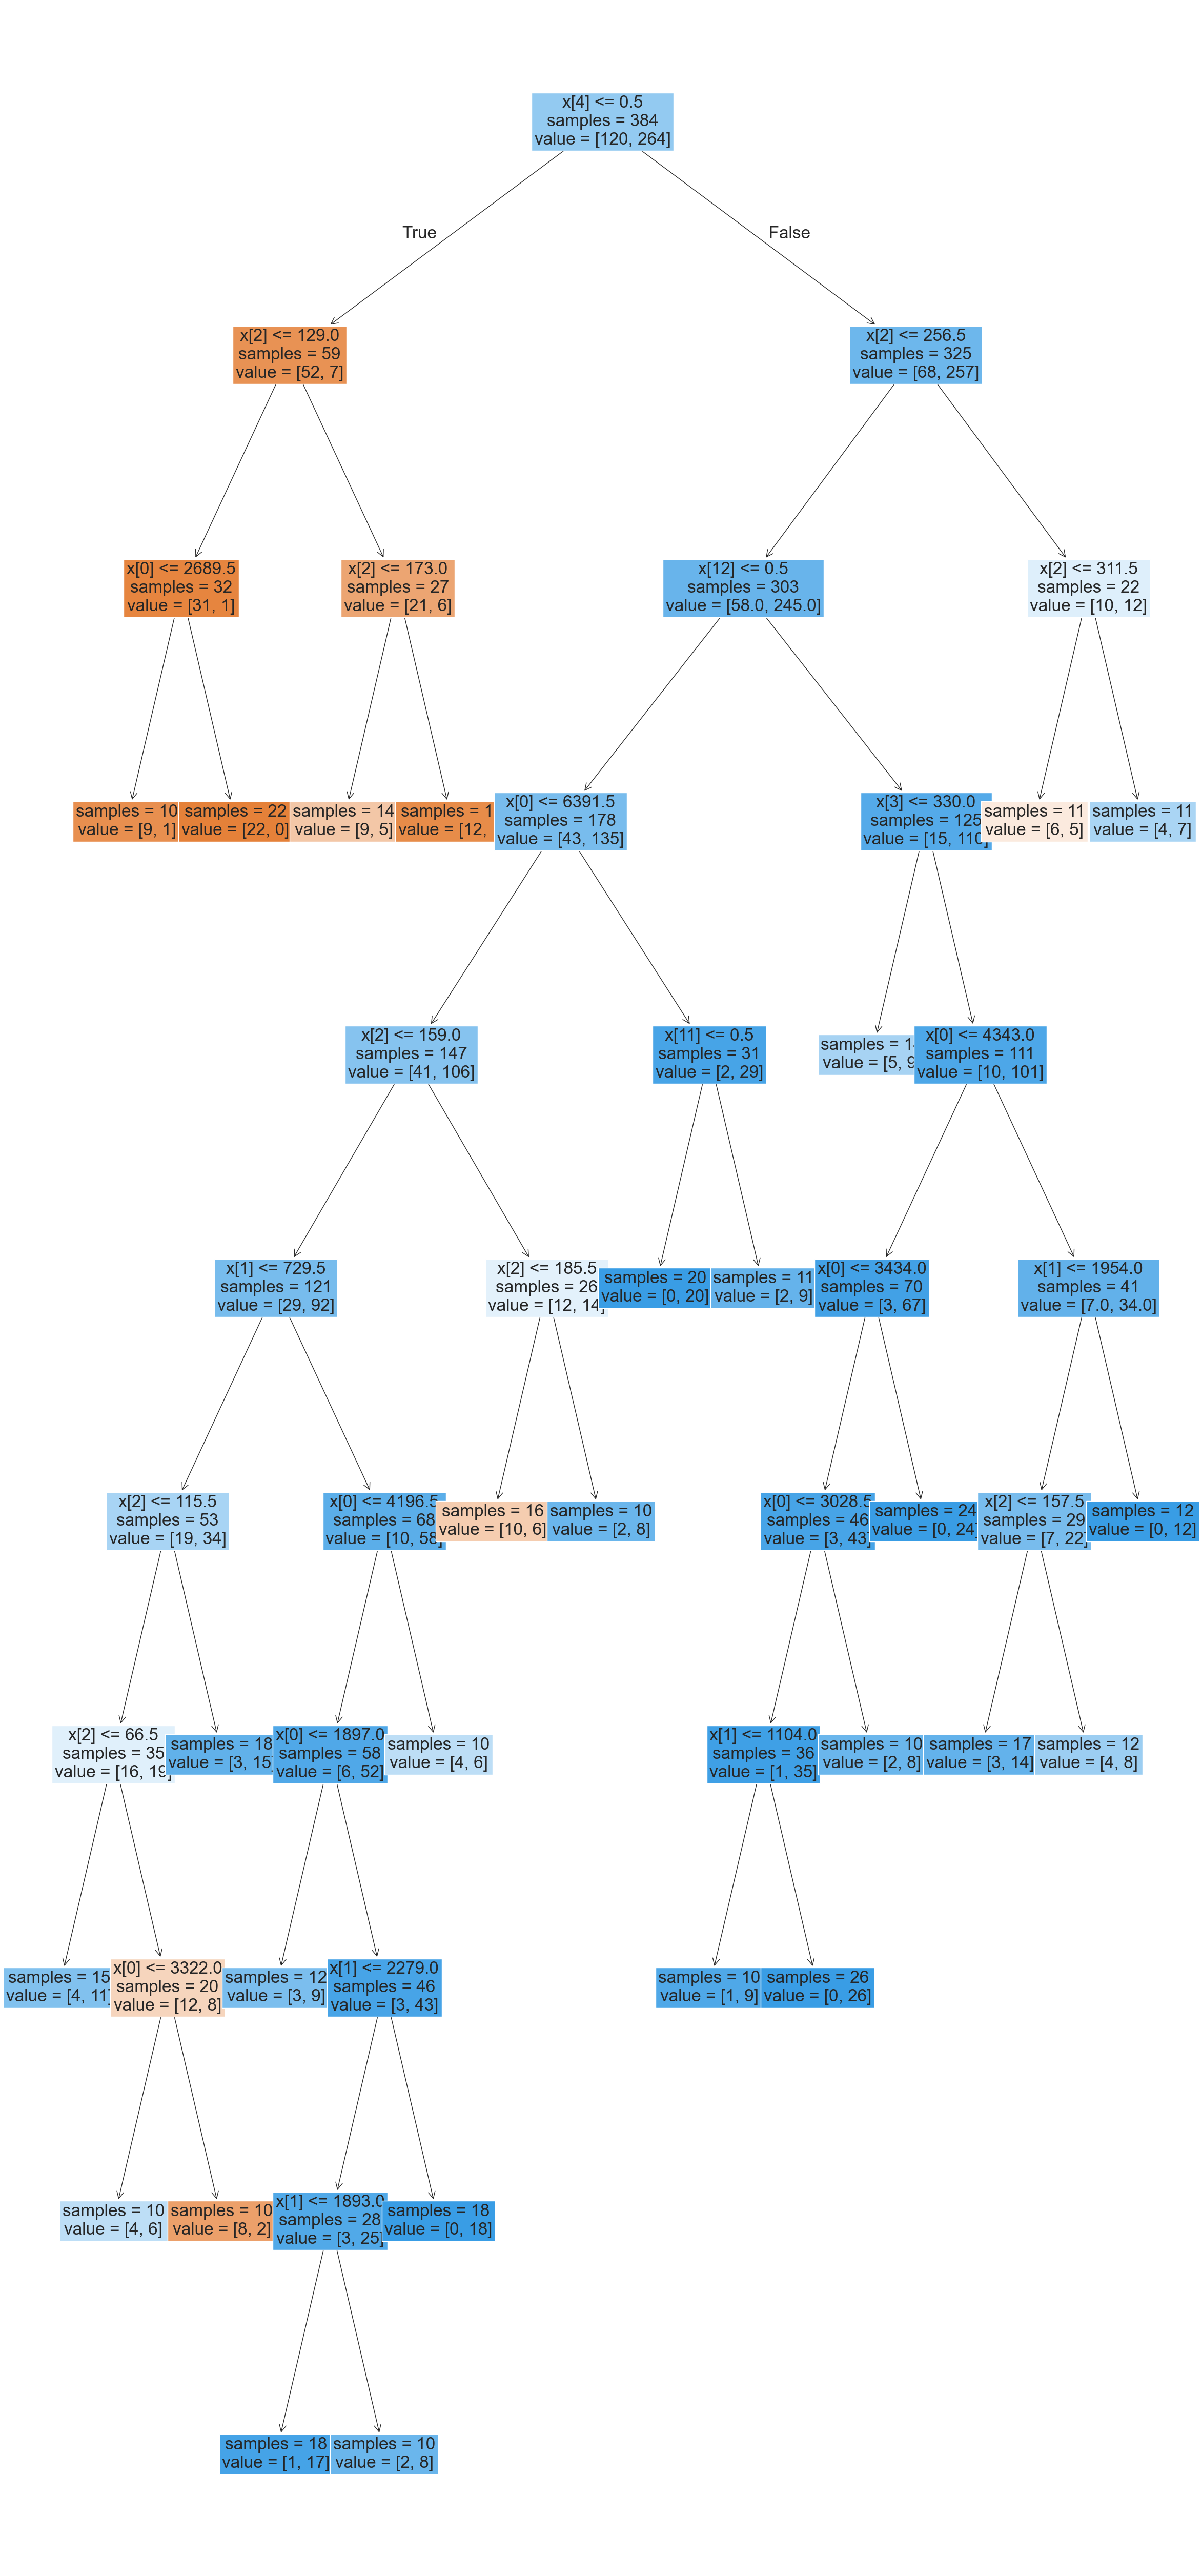

In [79]:
plt.figure(figsize = (30,65))
plot_tree(best_model, impurity = False, filled = True, fontsize = 24)
plt.show()

https://aws.amazon.com/machine-learning/accelerate-amazon-sagemaker/